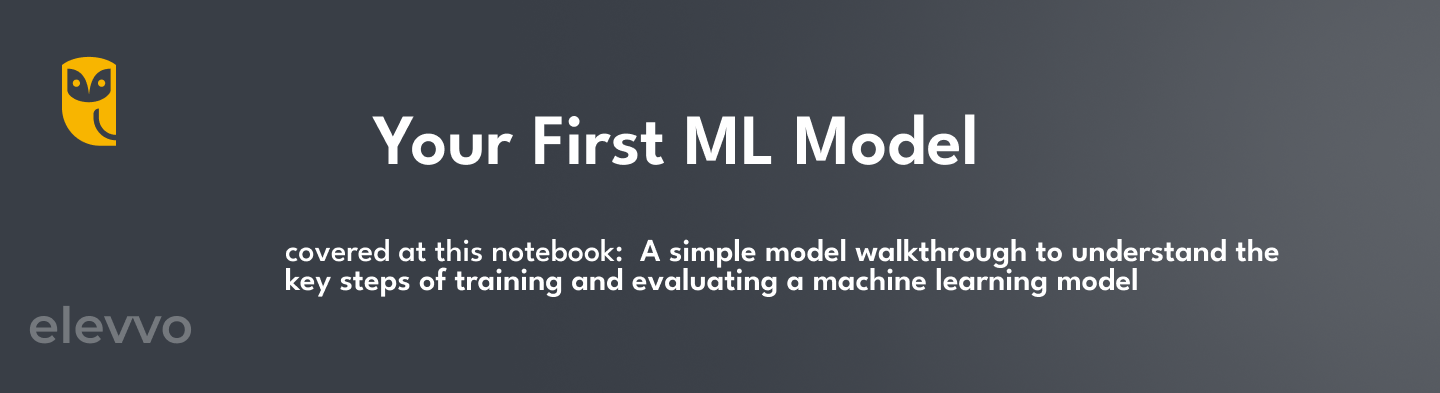

# Selecting Data for Modeling
📌 Your dataset had  too many variables to wrap your head around, or even to print out nicely.  How can you pare down this overwhelming amount of data to something you can understand?

📌 We'll start by picking a few variables using our intuition. ther is also statistical techniques to automatically prioritize variables.

📌 To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the **columns** property of the DataFrame (the bottom line of code below).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

melbourne_file_path = '/content/drive/MyDrive/Machine Learning Track/Your First ML Model/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

📌 *if you need to explore more wayes to handle missing values, you can check pandas official documentation*

https://pandas.pydata.org/docs/index.html

In [ ]:
y = melbourne_data.Price

# Choosing "Features"
📌 The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features.

📌 We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [ ]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

By convention, this data is called **X**.

In [ ]:
X = melbourne_data[melbourne_features]

📌 Let's quickly review the data we'll be using to predict house prices using the `describe` method and the `head` method, which shows the top few rows.

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


📌 Visually checking your data with these commands is an important part of a data scientist's / machine learning engineer's job.  You'll frequently find surprises in the dataset that deserve further inspection.

---
# Building Your Model

📌 You will use the **scikit-learn** library to create your models.  When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

📌 The steps to building and using a model are:
* **Define:** What type of model will it be?  A decision tree?  Some other type of model? Some other parameters of the model type are specified too.
* **Fit:** Capture patterns from provided data. This is the heart of modeling.
* **Predict:** Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

📌 Many machine learning models allow some randomness in model training. Specifying a number for `random_state` ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

📌 We now have a fitted model that we can use to make predictions.

📌 In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.


In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


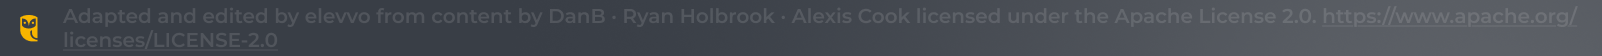